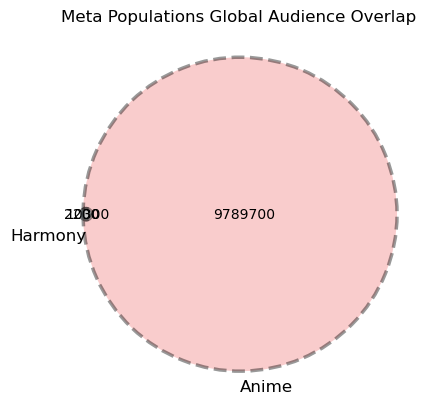

In [1]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Define the sizes of the two populations and their overlap
size_A = 12500  # Size of population A
size_B = 9800000  # Size of population B
overlap = 10300  # Size of the overlap

# Create a Venn diagram
venn = venn2(subsets=(round(size_A - overlap, 2), round(size_B - overlap, 2), overlap),
              set_labels=('Harmony', 'Anime'))

# Customize the properties of the circles
colors = ['lightblue', 'lightcoral', 'gray']  # Define colors for the two circles
for i, patch in enumerate(venn.patches):
    patch.set_facecolor(colors[i])  # Set the face color
    patch.set_edgecolor('black')  # Set the edge color
    patch.set_linestyle('--')  # Set linestyle to dashed
    patch.set_linewidth(2.5)  # Seåt line width (thickness)

# Show the plot
plt.title("Meta Populations Global Audience Overlap")
plt.show()

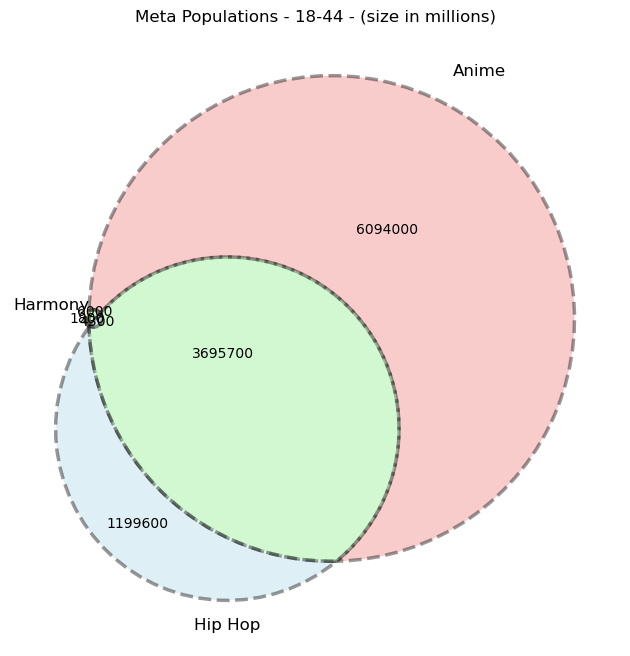

In [2]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Define the sizes of the three populations and their overlaps
size_A = 12500  # Harmony Fans
size_B = 9800000  # Anime Fans
size_C = 4900000  # Hip Hop Fans

# Define the overlaps between the sets
overlap_AB = 10300  # Overlap between Harmony and Anime Fans
overlap_AC = 4700   # Overlap between Harmony and Hip Hop Fans
overlap_BC = 3700000  # Overlap between Anime and Hip Hop Fans
overlap_ABC = 4300  # Overlap between all three groups

# Create a Venn diagram with three sets
venn = venn3(subsets=(round(size_A - overlap_AB - overlap_AC + overlap_ABC, 2),  # Only Harmony
                      round(size_B - overlap_AB - overlap_BC + overlap_ABC, 2),  # Only Anime
                      round(overlap_AB - overlap_ABC, 2),                        # Harmony and Anime Fans only
                      round(size_C - overlap_AC - overlap_BC + overlap_ABC, 2),  # Only Hip Hop
                      round(overlap_AC - overlap_ABC, 2),                        # Harmony and Hip Hop Fans only
                      round(overlap_BC - overlap_ABC, 2),                        # Anime and Hip Hop Fans only
                      overlap_ABC),                                              # Harmony, Anime, and Hip Hop
              set_labels=('Harmony', 'Anime', 'Hip Hop'))

# Customize the properties of the circles
colors = ['lightblue', 'lightcoral', 'lightgreen']  # Define colors for the three circles
for i, patch in enumerate(venn.patches):
    if patch:  # Some patches might be None if there are no overlaps
        patch.set_facecolor(colors[i % 3])  # Set the face color
        patch.set_edgecolor('black')  # Set the edge color
        patch.set_linestyle('--')  # Set linestyle to dashed
        patch.set_linewidth(2.5)  # Set line width (thickness)

# Increase the scale of the diagram
plt.gca().set_aspect('equal', adjustable='box')  # Make the diagram more balanced
plt.gcf().set_size_inches(8, 8)  # Make the plot larger

# Add a thicker border to the small circle for better visibility
if venn.get_label_by_id('100'):
    venn.get_label_by_id('100').set_fontsize(10)  # Increase font size of small circle label
if venn.get_patch_by_id('100'):
    venn.get_patch_by_id('100').set_linewidth(3)  # Thicken the outline of the small circle
    venn.get_patch_by_id('100').set_facecolor('yellow')  # Highlight the small circle

# Show the plot
plt.title("Meta Populations - 18-44 - (size in millions)")
plt.show()

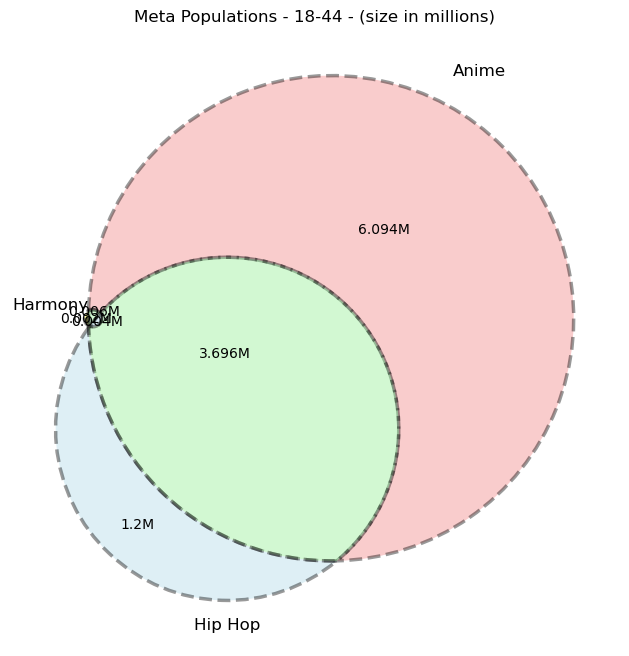

In [3]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Original counts
size_A = 12500  # Harmony Fans
size_B = 9800000  # Anime Fans
size_C = 4900000  # Hip Hop Fans

overlap_AB = 10300
overlap_AC = 4700
overlap_BC = 3700000
overlap_ABC = 4300

# Calculate each subset size in millions
only_A = round((size_A - overlap_AB - overlap_AC + overlap_ABC) / 1_000_000, 3)
only_B = round((size_B - overlap_AB - overlap_BC + overlap_ABC) / 1_000_000, 3)
AB = round((overlap_AB - overlap_ABC) / 1_000_000, 3)
only_C = round((size_C - overlap_AC - overlap_BC + overlap_ABC) / 1_000_000, 3)
AC = round((overlap_AC - overlap_ABC) / 1_000_000, 3)
BC = round((overlap_BC - overlap_ABC) / 1_000_000, 3)
ABC = round(overlap_ABC / 1_000_000, 3)

# Create Venn with rounded million values
venn = venn3(subsets=(only_A, only_B, AB, only_C, AC, BC, ABC), set_labels=('Harmony', 'Anime', 'Hip Hop'))

# Format labels to show values in millions with 'M' suffix
for subset_id in venn.set_labels:  # Set labels are fine as is
    pass

subset_ids = ['100', '010', '110', '001', '101', '011', '111']
for subset_id in subset_ids:
    label = venn.get_label_by_id(subset_id)
    if label:
        text = label.get_text()
        if text.strip() != '' and text != '0':
            try:
                num = float(text)
                label.set_text(f"{num}M")
            except:
                pass
        else:
            label.set_text('')

# Color and styling code (your existing customization) here...
colors = ['lightblue', 'lightcoral', 'lightgreen']
for i, patch in enumerate(venn.patches):
    if patch:
        patch.set_facecolor(colors[i % 3])
        patch.set_edgecolor('black')
        patch.set_linestyle('--')
        patch.set_linewidth(2.5)

plt.gca().set_aspect('equal', adjustable='box')
plt.gcf().set_size_inches(8, 8)

# Highlight small circle
if venn.get_label_by_id('100'):
    venn.get_label_by_id('100').set_fontsize(10)
if venn.get_patch_by_id('100'):
    venn.get_patch_by_id('100').set_linewidth(3)
    venn.get_patch_by_id('100').set_facecolor('yellow')

plt.title("Meta Populations - 18-44 - (size in millions)")
plt.show()

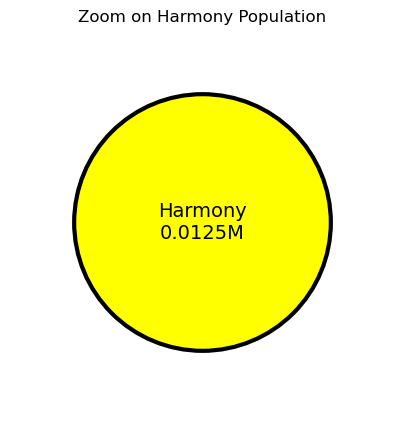

In [4]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2

# Use your values (in millions) for Harmony only
only_A = 0.0125  # Harmony size in millions (scaled down from your data)

# Since it's so small, plot it as a single circle, scaling the size to be visible
scale_factor = 40  # increase size for visibility

fig, ax = plt.subplots(figsize=(5,5))

# Draw a single circle manually to represent Harmony
circle = plt.Circle((0.5, 0.5), only_A * scale_factor, color='yellow', ec='black', lw=3)
ax.add_patch(circle)

# Add label in the center
ax.text(0.5, 0.5, f'Harmony\n{only_A}M', ha='center', va='center', fontsize=14)

# Set limits tightly around the circle
ax.set_xlim(0.5 - only_A * scale_factor*1.5, 0.5 + only_A * scale_factor*1.5)
ax.set_ylim(0.5 - only_A * scale_factor*1.5, 0.5 + only_A * scale_factor*1.5)
ax.set_aspect('equal')
ax.axis('off')
plt.title('Zoom on Harmony Population')

plt.show()